In [2]:
#importing important librarier
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import IsolationForest

In [3]:
#loading the dataset 
file_path = 'C:/Users/Nitin/loan/loan_data.csv'
loan_data = pd.read_csv(file_path)

In [4]:
loan_data.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


In [5]:
#checking for missing values
print("missing values in each column:")
print(loan_data.isnull().sum())

missing values in each column:
person_age                        0
person_gender                     0
person_education                  0
person_income                     0
person_emp_exp                    0
person_home_ownership             0
loan_amnt                         0
loan_intent                       0
loan_int_rate                     0
loan_percent_income               0
cb_person_cred_hist_length        0
credit_score                      0
previous_loan_defaults_on_file    0
loan_status                       0
dtype: int64


In [6]:
#encoding categorical features to numerical by using label encoder
label_encoder = LabelEncoder()
for col in ['person_gender', 'person_education', 'person_home_ownership', 'loan_intent', 'previous_loan_defaults_on_file']:
    loan_data[col] = label_encoder.fit_transform(loan_data[col])

In [7]:
loan_data.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,0,4,71948.0,0,3,35000.0,4,16.02,0.49,3.0,561,0,1
1,21.0,0,3,12282.0,0,2,1000.0,1,11.14,0.08,2.0,504,1,0
2,25.0,0,3,12438.0,3,0,5500.0,3,12.87,0.44,3.0,635,0,1
3,23.0,0,1,79753.0,0,3,35000.0,3,15.23,0.44,2.0,675,0,1
4,24.0,1,4,66135.0,1,3,35000.0,3,14.27,0.53,4.0,586,0,1


In [8]:
#import library for visualise
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
loan_data.describe()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
count,45000.000000,45000.000000,45000.000000,4.500000e+04,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000
mean,27.764178,0.552022,1.743933,8.031905e+04,5.410333,1.696622,9583.157556,2.525911,11.006606,0.139725,5.867489,632.608756,0.507956,0.222222
std,6.045108,0.497292,1.479148,8.042250e+04,6.063532,1.440497,6314.886691,1.728305,2.978808,0.087212,3.879702,50.435865,0.499942,0.415744
min,20.000000,0.000000,0.000000,8.000000e+03,0.000000,0.000000,500.000000,0.000000,5.420000,0.000000,2.000000,390.000000,0.000000,0.000000
25%,24.000000,0.000000,0.000000,4.720400e+04,1.000000,0.000000,5000.000000,1.000000,8.590000,0.070000,3.000000,601.000000,0.000000,0.000000
50%,26.000000,1.000000,1.000000,6.704800e+04,4.000000,3.000000,8000.000000,3.000000,11.010000,0.120000,4.000000,640.000000,1.000000,0.000000
75%,30.000000,1.000000,3.000000,9.578925e+04,8.000000,3.000000,12237.250000,4.000000,12.990000,0.190000,8.000000,670.000000,1.000000,0.000000
max,144.000000,1.000000,4.000000,7.200766e+06,125.000000,3.000000,35000.000000,5.000000,20.000000,0.660000,30.000000,850.000000,1.000000,1.000000


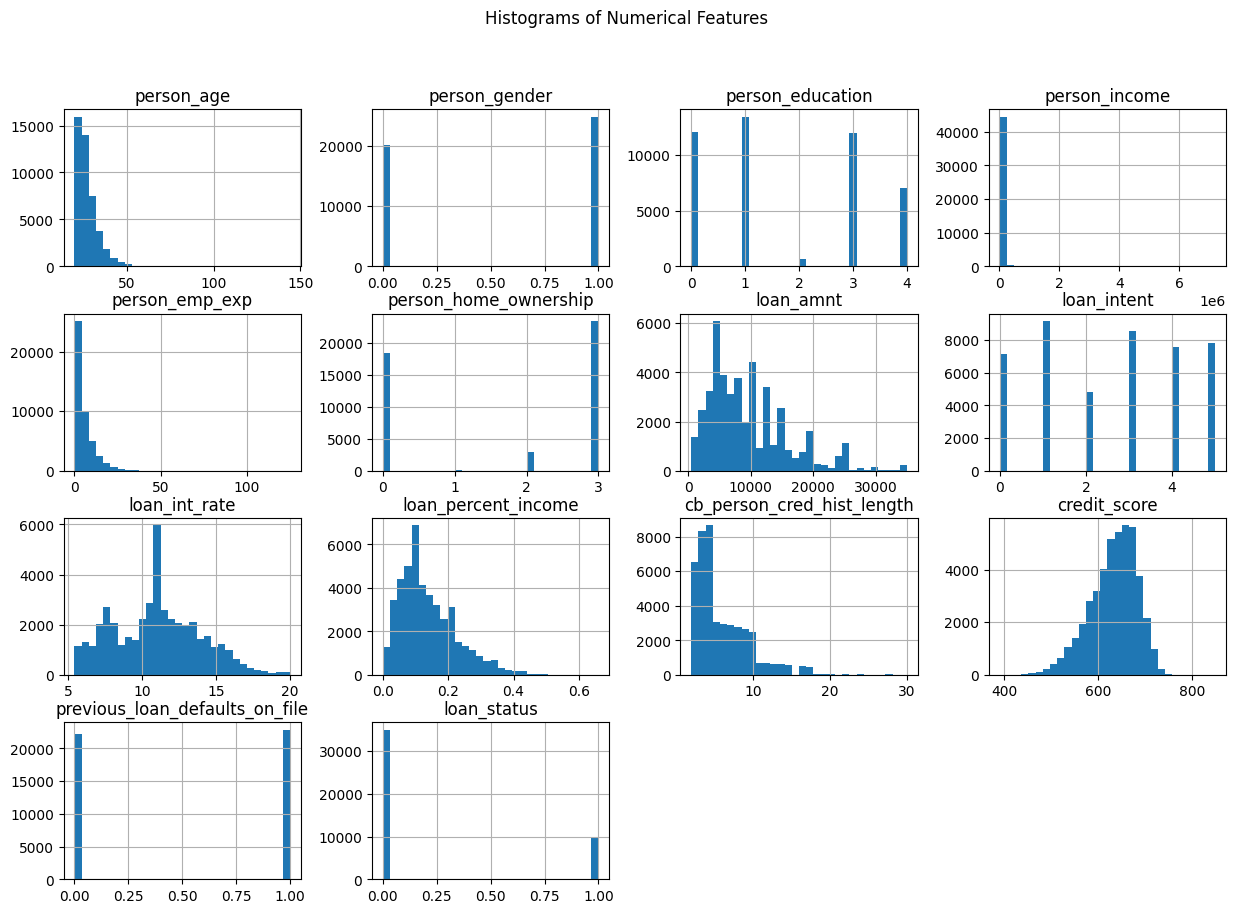

In [10]:

# 3a: Histograms of numerical features
loan_data.hist(bins=30, figsize=(15, 10))
plt.suptitle("Histograms of Numerical Features")
plt.show()

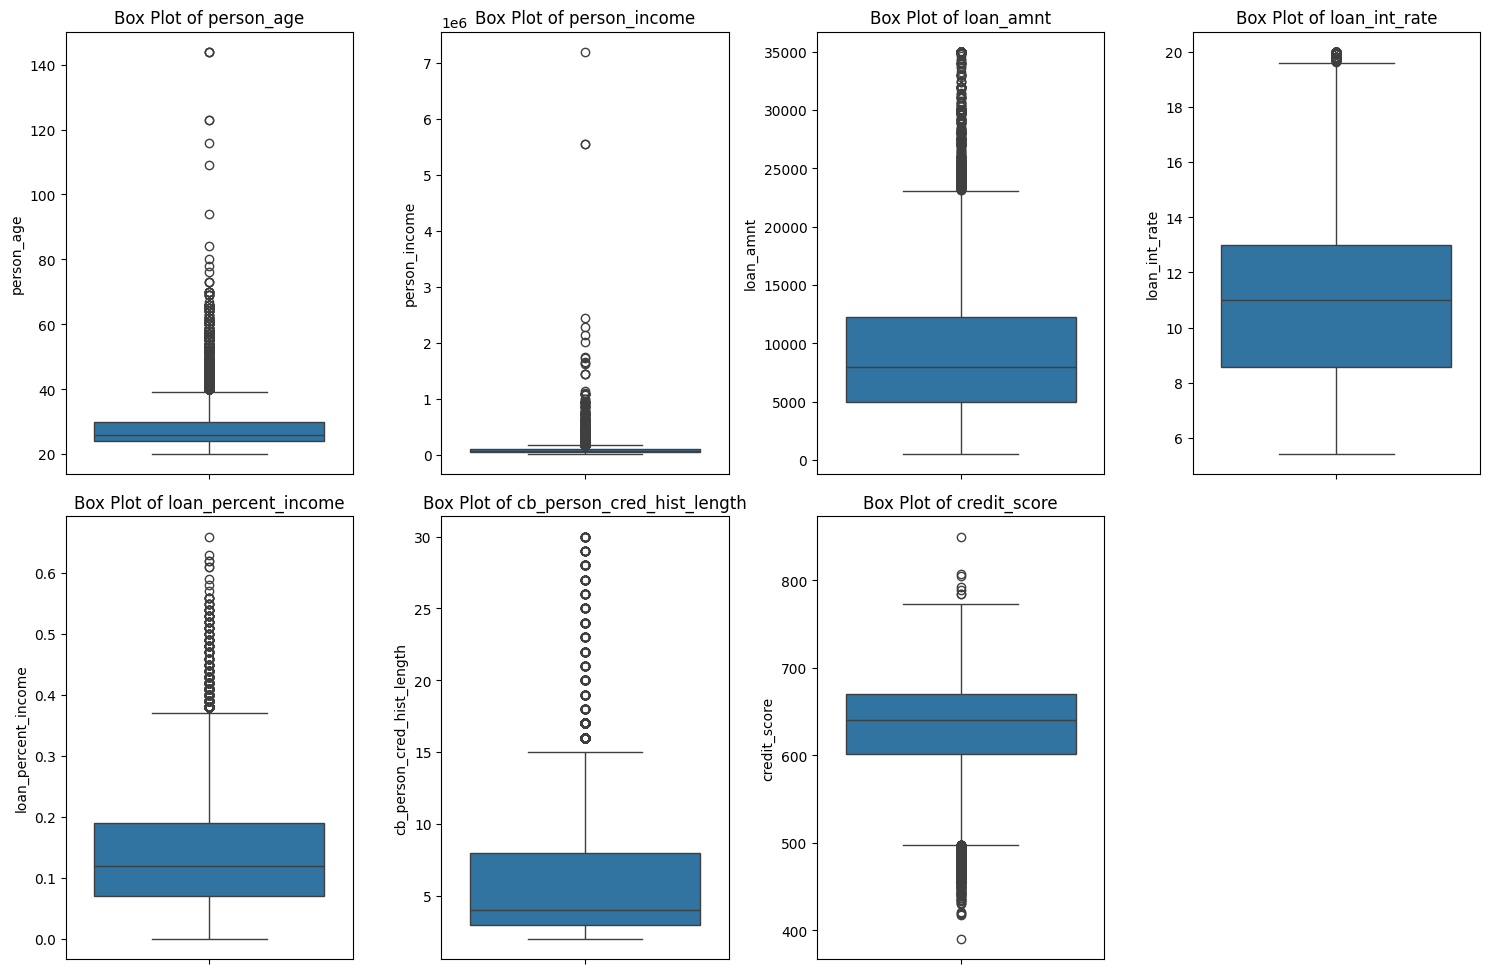

In [11]:
plt.figure(figsize=(15, 10))
for i, column in enumerate(['person_age', 'person_income', 'loan_amnt', 'loan_int_rate', 
                            'loan_percent_income', 'cb_person_cred_hist_length', 'credit_score']):
    plt.subplot(2, 4, i + 1)
    sns.boxplot(y=loan_data[column])
    plt.title(f'Box Plot of {column}')
plt.tight_layout()
plt.show()


In [13]:
loan_data['person_age'].max()

144.0

In [14]:
#determine caps based on realistic
#Capping 'person_age' at 80
loan_data['person_age']= loan_data['person_age'].apply(lambda x: min(x, 80))

In [16]:
loan_data.shape

(45000, 14)

In [17]:
loan_data['person_age'].max()

80.0

Summary statistics after capping outliers:
          person_age  person_gender  person_education  person_income  \
count  45000.000000   45000.000000      45000.000000   45000.000000   
mean      27.756156       0.552022          1.743933   78045.597333   
std        5.941187       0.497292          1.479148   45467.702511   
min       20.000000       0.000000          0.000000    8000.000000   
25%       24.000000       0.000000          0.000000   47204.000000   
50%       26.000000       1.000000          1.000000   67048.000000   
75%       30.000000       1.000000          3.000000   95789.250000   
max       80.000000       1.000000          4.000000  271450.060000   

       person_emp_exp  person_home_ownership     loan_amnt   loan_intent  \
count    45000.000000           45000.000000  45000.000000  45000.000000   
mean         5.410333               1.696622   9538.695133      2.525911   
std          6.063532               1.440497   6160.102165      1.728305   
min         

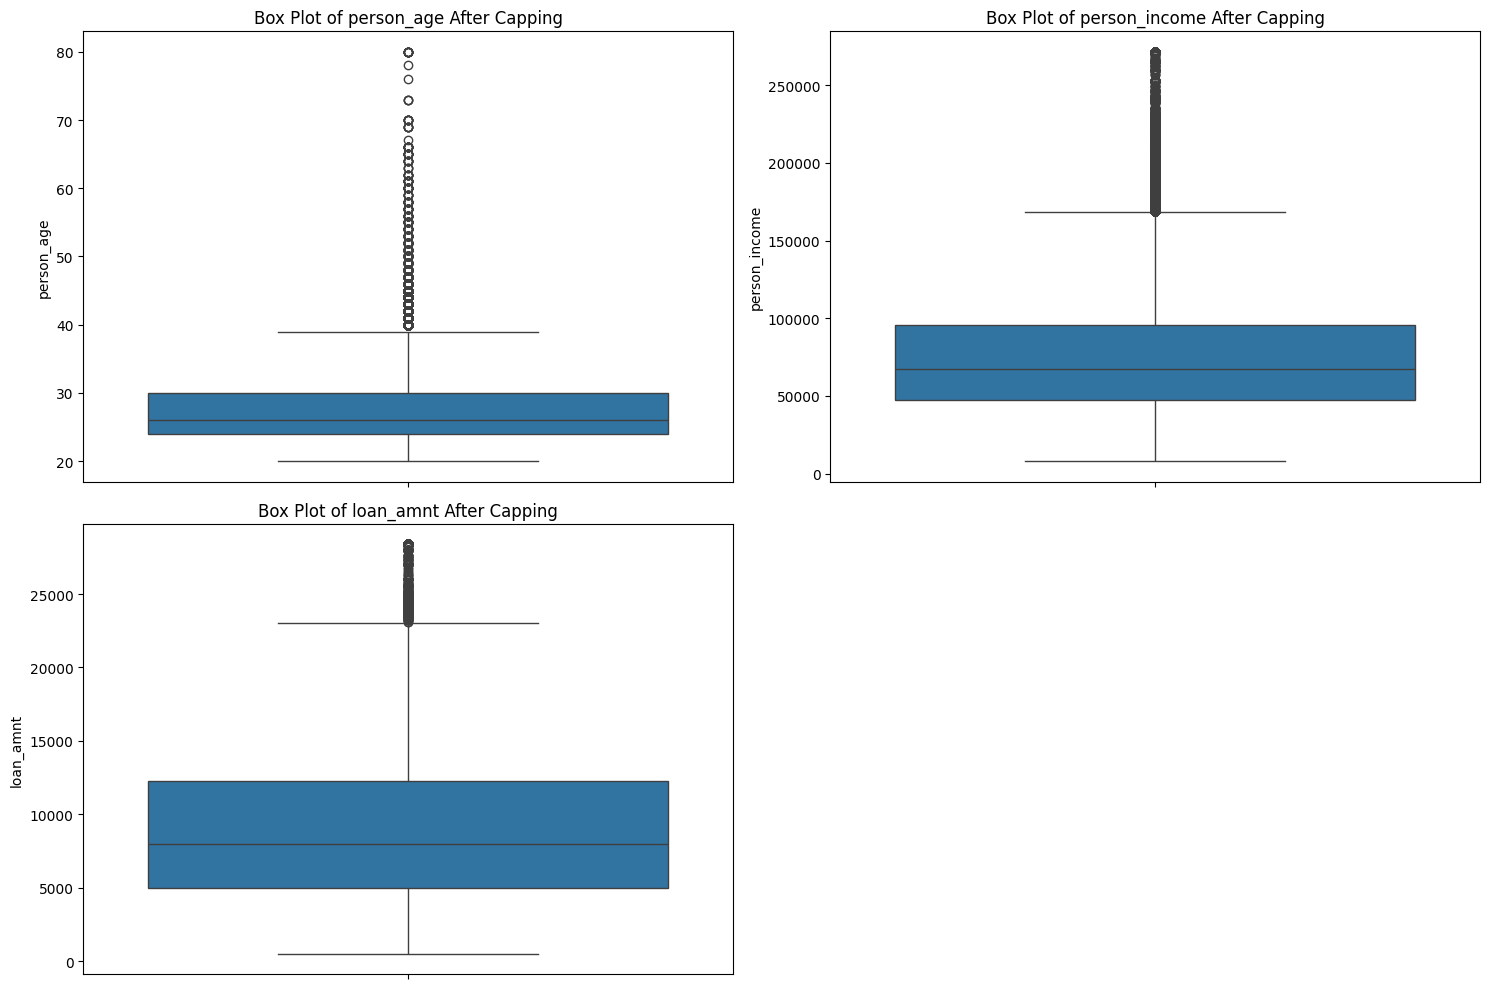

In [18]:
# Cap `person_income` and `loan_amnt` at the 99th percentile
income_cap = loan_data['person_income'].quantile(0.99)
loan_data['person_income'] = loan_data['person_income'].apply(lambda x: min(x, income_cap))

loan_amnt_cap = loan_data['loan_amnt'].quantile(0.99)
loan_data['loan_amnt'] = loan_data['loan_amnt'].apply(lambda x: min(x, loan_amnt_cap))

# Step 2: Verify the capping by checking summary statistics again
print("Summary statistics after capping outliers:\n", loan_data.describe())

# Optional: Visualize again to confirm the effect of capping
plt.figure(figsize=(15, 10))
for i, column in enumerate(['person_age', 'person_income', 'loan_amnt']):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(y=loan_data[column])
    plt.title(f'Box Plot of {column} After Capping')
plt.tight_layout()
plt.show()

In [19]:
loan_data.nunique()

person_age                           54
person_gender                         2
person_education                      5
person_income                     33541
person_emp_exp                       63
person_home_ownership                 4
loan_amnt                          4417
loan_intent                           6
loan_int_rate                      1302
loan_percent_income                  64
cb_person_cred_hist_length           29
credit_score                        340
previous_loan_defaults_on_file        2
loan_status                           2
dtype: int64

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import IsolationForest



In [22]:
# Step 1: Split the dataset into training and testing sets
# We'll exclude 'loan_status' from features, as it's the target or label column.
features = loan_data.drop(columns=['loan_status'], errors='ignore')
X_train, X_test = train_test_split(features, test_size=0.3, random_state=42)

# Step 2: Initialize the Isolation Forest model
contamination_rate = 0.05  # Adjust based on expected anomaly proportion
isolation_forest = IsolationForest(n_estimators=100, contamination=contamination_rate, random_state=42)

# Step 3: Fit the model on the training data
isolation_forest.fit(X_train)

# Step 4: Predict anomalies on the test data
X_test['anomaly'] = isolation_forest.predict(X_test)

# Step 5: Analyze the results
# Count the predicted anomalies (-1) and normal cases (1)
anomaly_counts = X_test['anomaly'].value_counts()
print("Anomaly counts in the test set:\n", anomaly_counts)

# Optional: Display detected anomalies in the test set
anomalies_test = X_test[X_test['anomaly'] == -1]
print("Detected anomalies in the test set:\n", anomalies_test)


c:\Python\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Anomaly counts in the test set:
 anomaly
 1    12853
-1      647
Name: count, dtype: int64
Detected anomalies in the test set:
        person_age  person_gender  person_education  person_income  \
30086        50.0              1                 1       55772.00   
41230        43.0              0                 3       67140.00   
31863        41.0              1                 3      167170.00   
32098        41.0              0                 3       46963.00   
22715        28.0              0                 4       70058.00   
...           ...            ...               ...            ...   
17859        29.0              0                 1      271450.06   
12220        24.0              0                 1       89984.00   
31914        42.0              1                 3      271450.06   
32410        51.0              1                 2       85981.00   
31797        43.0              0                 0      175010.00   

       person_emp_exp  person_home_ownershi